# You are a Data Analyst at a global SaaS / content platform. 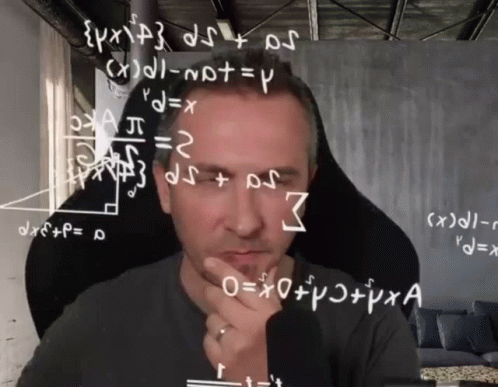
The given data tracks user sessions and actions on the website.

In [7]:
import pandas as pd

data = {
    "session_id": [
        "S001","S002","S003","S004","S005","S006","S007","S008","S009","S010",
        "S011","S012","S013","S014","S015","S016"
    ],
    "user_id": [
        "U101","U102","U101","U103","U104","U102","U105","U106",
        "U101","U104","U103","U105","U107","U106","U102","U108"
    ],
    "country": [
        "US","US","US","UK","UK","US","CA","CA",
        "US","UK","UK","CA","US","CA","US","US"
    ],
    "device": [
        "Desktop","Mobile","Mobile","Desktop","Mobile","Desktop",
        "Desktop","Mobile","Desktop","Desktop","Mobile","Desktop",
        "Mobile","Desktop","Mobile","Desktop"
    ],
    "traffic_source": [
        "Organic","Paid","Email","Organic","Paid","Organic",
        "Referral","Organic","Paid","Email","Paid","Referral",
        "Organic","Paid","Email","Organic"
    ],
    "pages_viewed": [5,3,4,6,2,7,8,3,6,4,5,9,2,7,3,4],
    "session_duration_sec": [300,180,240,420,150,480,520,200,410,260,390,600,140,460,190,280],
    "conversion": [1,0,1,1,0,1,1,0,1,0,1,1,0,1,0,0],
    "session_date": pd.to_datetime([
        "2024-01-03","2024-01-04","2024-01-06","2024-01-07",
        "2024-01-10","2024-01-12","2024-01-15","2024-01-18",
        "2024-02-02","2024-02-05","2024-02-08","2024-02-12",
        "2024-02-15","2024-02-20","2024-02-22","2024-02-25"
    ])
}

df = pd.DataFrame(data)


In [8]:
df

,session_id,user_id,country,device,traffic_source,pages_viewed,session_duration_sec,conversion,session_date
0,S001,U101,US,Desktop,Organic,5,300,1,2024-01-03
1,S002,U102,US,Mobile,Paid,3,180,0,2024-01-04
2,S003,U101,US,Mobile,Email,4,240,1,2024-01-06
3,S004,U103,UK,Desktop,Organic,6,420,1,2024-01-07
4,S005,U104,UK,Mobile,Paid,2,150,0,2024-01-10
5,S006,U102,US,Desktop,Organic,7,480,1,2024-01-12
6,S007,U105,CA,Desktop,Referral,8,520,1,2024-01-15
7,S008,U106,CA,Mobile,Organic,3,200,0,2024-01-18
8,S009,U101,US,Desktop,Paid,6,410,1,2024-02-02
9,S010,U104,UK,Desktop,Email,4,260,0,2024-02-05


**Q1. High-Value Users**

Which users bring the most value to the platform?

In [9]:
user_metrics = df.groupby("user_id").agg(
    total_sessions=("session_id","count"),
    total_duration=("session_duration_sec","sum"),
    conversions=("conversion","sum")
)
user_metrics["conversion_rate"] = (
    user_metrics["conversions"] / user_metrics["total_sessions"]
)
user_metrics = user_metrics.sort_values(
    by=["conversion_rate", "total_duration"],
    ascending=[False, False]
)

print(user_metrics)




         total_sessions  total_duration  conversions  conversion_rate
user_id                                                              
U105                  2            1120            2         1.000000
U101                  3             950            3         1.000000
U103                  2             810            2         1.000000
U106                  2             660            1         0.500000
U102                  3             850            1         0.333333
U104                  2             410            0         0.000000
U108                  1             280            0         0.000000
U107                  1             140            0         0.000000


**Q2. Traffic Source Effectiveness**

Which traffic sources are actually converting users?

In [10]:
traffic_metrics = df.groupby("traffic_source").agg(
    total_sessions=("session_id", "count"),   # count how many sessions
    total_conversions=("conversion", "sum"), # sum of 1/0 conversions
    avg_pages=("pages_viewed", "mean")       # average pages per session
)

print(traffic_metrics)


                total_sessions  total_conversions  avg_pages
traffic_source                                              
Email                        3                  1   3.666667
Organic                      6                  3   4.500000
Paid                         5                  3   4.600000
Referral                     2                  2   8.500000


**Q3. Device Performance Analysis**

Does device type affect engagement?

In [16]:
device_metrics = df.groupby("device").agg(
    avg_duration=("session_duration_sec","mean"),  
    avg_pages=("pages_viewed","mean"),            
    total_conversions=("conversion","sum"),       
    total_sessions=("session_id","count")         
)


device_metrics["conversion_rate"] = device_metrics["total_conversions"] / device_metrics["total_sessions"]


device_metrics = device_metrics.drop(columns=["total_conversions","total_sessions"])


device_metrics = device_metrics.sort_values(by=["conversion_rate","avg_duration"], ascending=[False,False])

print(device_metrics)


         avg_duration  avg_pages  conversion_rate
device                                           
Desktop    414.444444   6.222222         0.777778
Mobile     212.857143   3.142857         0.285714


**Q4. Country-Level Growth Prioritization**

In [17]:
df.head(1)

,session_id,user_id,country,device,traffic_source,pages_viewed,session_duration_sec,conversion,session_date
0,S001,U101,US,Desktop,Organic,5,300,1,2024-01-03


Which countries show the strongest engagement?

In [ ]:
countries = df.groupby("country").agg(
    Total_sessions=("session_id","count"),
    avg_session_duration=("session_duration_sec","mean"),
    total_conversions=("conversion","sum")
)

countries["conversion_rate"] = countries["total_conversions"] / countries["Total_sessions"]

# Drop total_conversions if not needed
countries = countries.drop(columns="total_conversions")

# Sort by conversion rate first, then avg session duration
countries = countries.sort_values(by=["conversion_rate","avg_session_duration"], ascending=[False,False])

print(countries)


         Total_sessions  avg_session_duration      rate
country                                                
CA                    4                 445.0  111.2500
UK                    4                 305.0   76.2500
US                    8                 277.5   34.6875
